In [275]:
!pip install -q matplotlib numpy pandas seaborn scikit-learn ipython
!pip install -q kneed

print("Librerias instaladas!!!")

Librerias instaladas!!!


In [276]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [277]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,NaN,1,NaN,3/03/1984,NaN,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,13/03/2020,1,NaN,3/07/1977,NaN,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,NaN,1,NaN,3/08/2017,NaN,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,NaN,1,NaN,16/02/2008,NaN,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [278]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [279]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [280]:
def mostrar_columnas_con_nulos(dataframe):
    # Obtener un DataFrame booleano que muestra True donde hay valores nulos
    valores_nulos = dataframe.isnull()

    # Calcular la cantidad de valores nulos en cada columna
    cantidad_nulos = valores_nulos.sum()

    # Filtrar las columnas que tienen al menos un valor nulo
    columnas_con_nulos = cantidad_nulos[cantidad_nulos > 0]

    # Mostrar las columnas con valores nulos y su cantidad
    if not columnas_con_nulos.empty:
        print("Columnas con valores nulos y su cantidad:\n")
        print(columnas_con_nulos)
    else:
        print("No se encontraron valores nulos en ninguna columna.")

In [281]:
mostrar_columnas_con_nulos(df)

Columnas con valores nulos y su cantidad:

cod_ase_               9
fecha_contagio         2
inicio_sintomas        2
fec_hos_            1014
fecha_defuncion     1262
certif_defuncion    1262
dtype: int64


In [282]:
def imprimir_valores_unicos(df, max_valores=10):
    for columna in df.columns:
        valores_unicos = df[columna].unique()
        if len(valores_unicos) <= max_valores:
            print(f'Valores únicos en la columna {columna}:')
            for valor in valores_unicos:
                print(valor)
        else:
            print(f'La columna {columna} tiene más de {max_valores} valores únicos, por lo que no se imprimen.')
        print('\n')

# Llama a la función con tu DataFrame df
imprimir_valores_unicos(df)


La columna ID tiene más de 10 valores únicos, por lo que no se imprimen.


La columna fec_not tiene más de 10 valores únicos, por lo que no se imprimen.


La columna semana tiene más de 10 valores únicos, por lo que no se imprimen.


Valores únicos en la columna año:
2020


La columna edad_ tiene más de 10 valores únicos, por lo que no se imprimen.


Valores únicos en la columna uni_med_:
1
2
4


Valores únicos en la columna sexo_:
F
M


Valores únicos en la columna cod_pais_o:
170


Valores únicos en la columna cod_dpto_o:
68
23
20
41
91


Valores únicos en la columna cod_mun_o:
276
1
547
307
81
206
77
710
0


Valores únicos en la columna area_:
1
2
3


La columna ocupacion_ tiene más de 10 valores únicos, por lo que no se imprimen.


Valores únicos en la columna tip_ss_:
Contributivo
Especial
Subsidiado
Particular
No asegurado


La columna cod_ase_ tiene más de 10 valores únicos, por lo que no se imprimen.


Valores únicos en la columna gp_discapa:
2
1


Valores únicos en la columna 

In [283]:
def imprimir_valores_unicos(df, columnas):
    for columna in columnas:
        if columna in df.columns:
            valores_unicos = df[columna].unique()
            print(f'Valores únicos en la columna {columna}:')
            for valor in valores_unicos:
                print(valor)
            print('\n')

# Llama a la función con tu DataFrame df y una lista de columnas específicas
columnas_especificas = ['cod_pais_o', 'cod_dpto_o']
imprimir_valores_unicos(df, columnas_especificas)

Valores únicos en la columna cod_pais_o:
170


Valores únicos en la columna cod_dpto_o:
68
23
20
41
91




In [284]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Definir una función para codificar variables categóricas
def encode_categorical_column(df, column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    print(f"Mapeo de valores textuales a numéricos para '{column_name}':")
    for label, numeric_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"{label} -> {numeric_value}")
    print("\n")

# Crear una copia del DataFrame original df
dfClean = df.copy()

# Limpieza de datos en dfClean
# Eliminar filas con valores nulos en las columnas especificadas
columns_with_nulls = ['cod_ase_', 'fecha_contagio', 'inicio_sintomas']
dfClean.dropna(subset=columns_with_nulls, inplace=True)

# Verificar si las columnas existen antes de eliminarlas
columns_to_remove = ['ID', 'año', 'cod_dpto_o', 'cod_pais_o', 'semana', 'cod_mun_o', 'fec_not', 'ocupacion_', 'fec_hos_', 'fecha_defuncion', 'certif_defuncion', 'cod_ase_', 'fecha_contagio', 'inicio_sintomas', 'fecha_nacimiento', ]
existing_columns = set(dfClean.columns)
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]

if columns_to_remove:
    dfClean.drop(columns_to_remove, axis=1, inplace=True)

# Utilizar la función para codificar variables textuales
encode_categorical_column(dfClean, 'sexo_')

Mapeo de valores textuales a numéricos para 'sexo_':
F -> 0
M -> 1




In [285]:
# Utilizar get_dummies para codificar variables textuales en one-hot
dfClean = pd.get_dummies(dfClean, columns=['tip_ss_', 'conducta'])

# Esto creará nuevas columnas para 'tip_ss_' y 'conducta' con valores numéricos únicos
# Ahora, dfClean contiene las columnas codificadas en one-hot

In [286]:
dfClean

,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion
0,25,1,0,1,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501,1,0,0,0,1,0,0,0
1,24,1,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400,1,0,0,0,1,0,0,0
2,58,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003,1,0,0,0,1,0,0,0
3,29,1,0,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958,1,0,0,0,1,0,0,0
4,56,1,0,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,36,1,0,1,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,7.072610,-73.099487,1,0,0,0,1,0,0,0
1258,42,1,1,1,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,7.065252,-73.103607,1,0,0,0,0,1,0,0
1259,2,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.091391,-73.103264,1,0,0,0,1,0,0,0
1260,12,1,0,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.061083,-73.097000,1,0,0,0,1,0,0,0


In [287]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas que deseas normalizar (asegúrate de que estas columnas contengan datos numéricos)
columns_to_normalize = ['edad_', 'latitud', 'longitud']  # Reemplaza con los nombres de tus columnas

# Crear un nuevo DataFrame 'df_normalized' para almacenar los datos normalizados
df_normalized = dfClean.copy()

def reemplazar_valores_uno_dos(df):
    for columna in df.columns:
        valores_unicos = df[columna].unique()
        if len(valores_unicos) == 2 and 1 in valores_unicos and 2 in valores_unicos:
            df[columna] = df[columna].replace({1: 0, 2: 1})

# Llama a la función con tu DataFrame df
reemplazar_valores_uno_dos(df_normalized)

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la normalización a las columnas seleccionadas
df_normalized[columns_to_normalize] = scaler.fit_transform(dfClean[columns_to_normalize])

# Ahora, 'df_normalized' contiene las características normalizadas.
# Puedes acceder a las primeras 5 filas de las características normalizadas de la siguiente manera:
scaled_features = df_normalized[columns_to_normalize].head()

In [288]:
df_normalized

,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion
0,-0.263977,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.151960,-0.904331,1,0,0,0,1,0,0,0
1,-0.312915,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.170292,-1.268275,1,0,0,0,1,0,0,0
2,1.350982,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1.168671,0.538994,1,0,0,0,1,0,0,0
3,-0.068224,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.945177,0.544741,1,0,0,0,1,0,0,0
4,1.253106,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,-0.994174,-1.215598,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0.274343,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,-0.466539,-0.526019,1,0,0,0,1,0,0,0
1258,0.567972,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,-1.147075,-1.043204,1,0,0,0,0,1,0,0
1259,-1.389554,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1.270458,-1.000104,1,0,0,0,1,0,0,0
1260,-0.900172,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,-1.532614,-0.213794,1,0,0,0,1,0,0,0


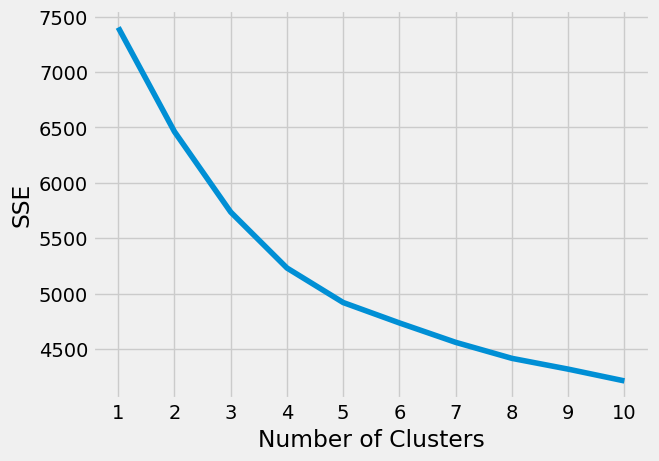

Número óptimo de clusters (elbow): 4


In [289]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Aplicar el código K-Means al DataFrame normalizado df_normalized

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_normalized)  # Usar el DataFrame normalizado df_normalized en lugar de scaled_features
    sse.append(kmeans.inertia_)

# Trazar la gráfica del codo
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Encontrar el codo (elbow) utilizando la biblioteca KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

# Obtener el número óptimo de clusters (elbow)
optimal_k = kl.elbow
print("Número óptimo de clusters (elbow):", optimal_k)


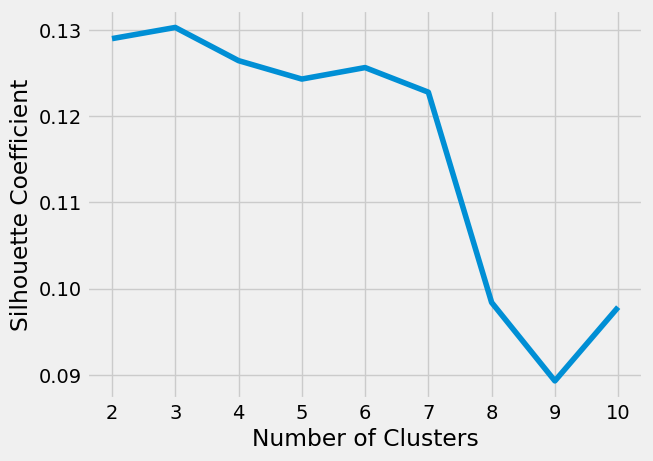

Número óptimo de clusters (según el coeficiente de silueta): 3


In [290]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_coefficients = []

# Aquí se inicia con 2 clústeres
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_normalized)  # Usar el DataFrame normalizado df_normalized en lugar de scaled_features
    score = silhouette_score(df_normalized, kmeans.labels_)  # Calcular el coeficiente de silueta
    silhouette_coefficients.append(score)

# Encontrar el número óptimo de clusters basado en el coeficiente de silueta
optimal_k = silhouette_coefficients.index(max(silhouette_coefficients)) + 2  # Sumar 2 para compensar el inicio desde k=2

# Trazar la gráfica del coeficiente de silueta
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

print("Número óptimo de clusters (según el coeficiente de silueta):", optimal_k)


In [291]:
from sklearn.cluster import KMeans

# Suponiendo que 'df_normalized' contiene tus datos normalizados y que deseas realizar la clustering en estas características
# Crear un objeto KMeans con 4 clusters
kmeans = KMeans(n_clusters=4)

# Realizar el clustering en tus datos normalizados y obtener las etiquetas de cluster para cada fila
df_normalized['cluster'] = kmeans.fit_predict(df_normalized[columns_to_normalize])

# Ahora, el DataFrame 'df_normalized' contiene una nueva columna llamada 'cluster' que contiene las etiquetas de cluster para cada fila.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [292]:
df_normalized

,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion,cluster
0,-0.263977,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.151960,-0.904331,1,0,0,0,1,0,0,0,2
1,-0.312915,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.170292,-1.268275,1,0,0,0,1,0,0,0,2
2,1.350982,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1.168671,0.538994,1,0,0,0,1,0,0,0,1
3,-0.068224,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.945177,0.544741,1,0,0,0,1,0,0,0,0
4,1.253106,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,-0.994174,-1.215598,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0.274343,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,-0.466539,-0.526019,1,0,0,0,1,0,0,0,2
1258,0.567972,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,-1.147075,-1.043204,1,0,0,0,0,1,0,0,2
1259,-1.389554,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1.270458,-1.000104,1,0,0,0,1,0,0,0,3
1260,-0.900172,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,-1.532614,-0.213794,1,0,0,0,1,0,0,0,2


In [293]:
# Suponiendo que ya has realizado el clustering y tienes la columna 'cluster' en 'df_normalized'

# Crear DataFrames separados para cada cluster
cluster_dataframes = [df_normalized[df_normalized['cluster'] == i].copy() for i in range(4)]


In [294]:
print("Dataset con filas de cluster 0:")
cluster_dataframes[0].head()

Dataset con filas de cluster 0:


,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion,cluster
3,-0.068224,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.945177,0.544741,1,0,0,0,1,0,0,0,0
5,0.714786,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,-0.396417,0.812910,1,0,0,0,1,0,0,0,0
11,-0.998049,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,-1.410496,0.648177,1,0,0,0,0,1,0,0,0
13,-0.655482,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,-1.167495,2.240912,0,0,0,1,0,1,0,0,0
14,-0.557605,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,-0.432360,0.774600,1,0,0,0,1,0,0,0,0


In [295]:
print("Dataset con filas de cluster 1:")
cluster_dataframes[1].head()

Dataset con filas de cluster 1:


,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion,cluster
2,1.350982,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1.168671,0.538994,1,0,0,0,1,0,0,0,1
4,1.253106,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,-0.994174,-1.215598,0,1,0,0,0,1,0,0,1
6,0.763725,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0.304582,0.766939,0,0,0,1,0,1,0,0,1
17,2.036117,1,0,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,-0.435844,0.662543,0,0,1,0,1,0,0,0,1
29,1.546735,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.307846,-0.917739,1,0,0,0,1,0,0,0,1


In [296]:
print("Dataset con filas de cluster 2:")
cluster_dataframes[2].head()

Dataset con filas de cluster 2:


,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion,cluster
0,-0.263977,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.151960,-0.904331,1,0,0,0,1,0,0,0,2
1,-0.312915,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.170292,-1.268275,1,0,0,0,1,0,0,0,2
8,-1.095925,2,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0.525224,-0.878471,0,0,0,1,0,1,0,0,2
9,-1.389554,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,-0.945486,-0.329682,1,0,0,0,1,0,0,0,2
15,0.225405,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,-0.308566,-0.321062,1,0,0,0,1,0,0,0,2


In [297]:
print("Dataset con filas de cluster 3:")
cluster_dataframes[3].head()

Dataset con filas de cluster 3:


,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,tip_ss__Contributivo,tip_ss__Especial,tip_ss__Particular,tip_ss__Subsidiado,conducta_1. Ambulatorio,conducta_2. Hospitalizacion piso,conducta_3. UCI,conducta_4. Observacion,cluster
7,-0.166100,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0.594949,1.173023,1,0,0,0,1,0,0,0,3
10,-0.802296,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1.259653,-0.684048,0,0,0,1,1,0,0,0,3
12,-1.046987,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0.802228,0.764065,1,0,0,0,0,1,0,0,3
21,-1.095925,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0.857708,-0.541345,1,0,0,0,0,0,0,1,3
22,-1.046987,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1.136432,0.083107,1,0,0,0,1,0,0,0,3
